In [1]:
# 导入类库
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import  set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# 导入数据
filename = '../../dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names, delim_whitespace=True)

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
dataset.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PRTATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
dataset.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [8]:
dataset.groupby('CHAS').size()

CHAS
0    471
1     35
dtype: int64

In [9]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


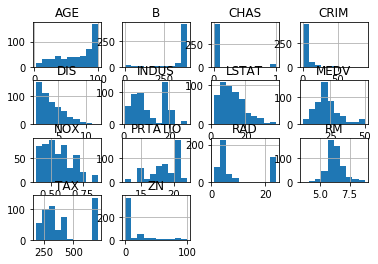

In [12]:
dataset.hist()
pyplot.show()

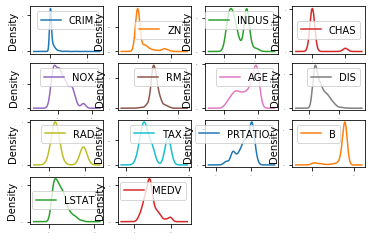

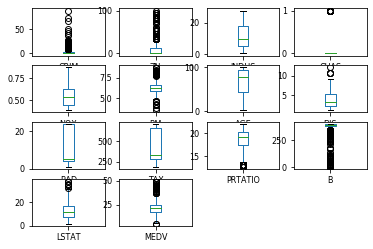

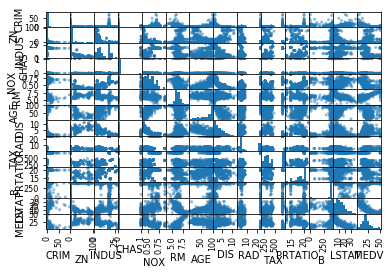

In [13]:
# 密度图
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
pyplot.show()

# 箱线图
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

# 散点矩阵图
scatter_matrix(dataset)
pyplot.show()

In [14]:
# 分离数据集
array = dataset.values
# 
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
# 训练数据集合测试数据集
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [15]:

# 评估算法 - baseline
models = {}
#线性回归算法
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
#非线性回归算法
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [16]:
# 评估算法 - 评估标准
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
# 算法结果LR 最好其次是CART

/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.093699 (10.719573)
SVM: -67.827886 (29.049138)


/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


--Return--
> <ipython-input-20-38cb23376f50>(8)<module>()->None
-> pdb.set_trace()
(Pdb) results
[array([ -9.79242784, -27.98675963, -39.57310026, -21.6483667 ,
       -19.30062302, -32.4894046 , -20.57890816,  -9.75795741,
       -21.94582648, -10.72518316]), array([-18.33610898, -29.91357373, -43.55123685, -28.31696574,
       -22.22178944, -35.12850484, -29.19323991, -14.03606848,
       -31.33439564, -14.04125196]), array([-16.6787478 , -28.07939127, -48.69770959, -29.87392419,
       -22.93394281, -39.93735777, -28.23952231, -15.86998892,
       -35.02187498, -13.99126195]), array([ -7.56517073, -20.5763122 , -53.35914146, -26.20798049,
       -16.34059   , -20.32352   , -18.83843   , -10.88054   ,
       -18.12718   ,  -8.85734   ]), array([-16.08878049, -10.41609756, -27.59073171, -36.68902439,
       -24.302     , -48.9395    , -22.5855    ,  -8.73425   ,
       -32.93375   , -23.865     ]), array([-13.08779763, -25.92545713, -73.94235979, -33.58183242,
       -25.73116691, -33

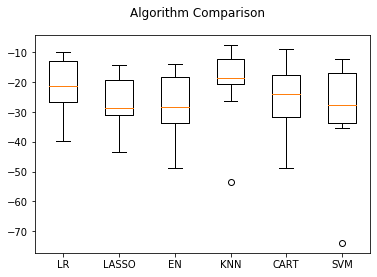

In [20]:
import pdb; 

#评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
pdb.set_trace()
ax.set_xticklabels(models.keys())
pyplot.show()
#线性算法的分布比较类似，并且K近邻算法的结果分布非常紧凑。

/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: S

ScalerLR: -21.379856 (9.414264)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)
ScalerKNN: -20.107620 (12.376949)
ScalerCART: -25.214463 (11.589690)
ScalerSVM: -29.633086 (17.009186)


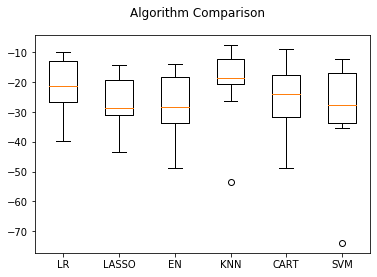

In [18]:
# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
#评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [21]:
# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


最优：-18.10930386178861 使用{'n_neighbors': 3}
-20.169640 (14.986904) with {'n_neighbors': 1}
-18.109304 (12.880861) with {'n_neighbors': 3}
-20.063115 (12.138331) with {'n_neighbors': 5}
-20.514297 (12.278136) with {'n_neighbors': 7}
-20.319536 (11.554509) with {'n_neighbors': 9}
-20.963145 (11.540907) with {'n_neighbors': 11}
-21.099040 (11.870962) with {'n_neighbors': 13}
-21.506843 (11.468311) with {'n_neighbors': 15}
-22.739137 (11.499596) with {'n_neighbors': 17}
-23.829011 (11.277558) with {'n_neighbors': 19}
-24.320892 (11.849667) with {'n_neighbors': 21}


In [22]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()),
                                       ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('RBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -15.393376 (6.552063)


/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB-KNN: -15.568504 (9.933848)
ScaledAB-LR: -24.918317 (9.696739)


/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRFR: -11.932845 (6.365064)


/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledETR: -9.087186 (5.023928)


/Users/jiuxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBR: -10.102414 (4.476571)
